Kanishk Mair (kmair@andrew.cmu.edu)
Date: 2018-10-22 09:38:53.938528


- ASSIGNMENT: quiz-2
- POINTS: 3
- CATEGORY: quiz
- RUBRIC: default
- RUBRIC_CATEGORIES: technical, presentation
- RUBRIC_WEIGHTS: 0.8, 0.2
- DUEDATE: 2018-10-22 10:20:00
- GRADER: John Kitchin


The vapor pressure of water has been measured as a function of temperature in the following data:



In [1]:
import numpy as np

# Temperature in degrees C
T = np.array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
                55.,  60.,  65.,  70.,  75.,  80.])

# Water vapor pressure in kPa
Pvap = np. array([  0.6113,   0.8726,   1.2281,   1.7056,   2.3388,   3.169 ,
          4.2455,   5.6267,   7.3814,   9.5898,  12.344 ,  15.752 ,
         19.932 ,  25.022 ,  31.176 ,  38.563 ,  47.373 ])

The Tetens equation:

$P = A e^{B T / (T + C)}$

is sometimes used to model temperature dependent vapor pressures. Use the data above to find the coefficients $A, B, C$. Make sure to show that your answer fits the data.



The coefficients obtained are: A = 0.607 kPa, B = 17.017 and C = 232.436 degree Celsius.


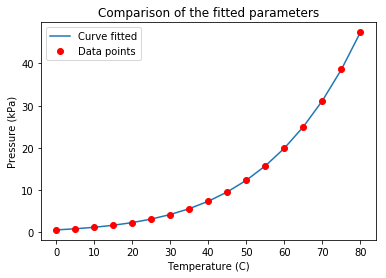

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def P(T, A, B, C):
    #A, B, C = par
    p = A * np.exp(B * T / (T + C))
    return p


par, pcov = curve_fit(P, T, Pvap, [0.6, 10, 20])
print(f'The coefficients obtained are: A = {par[0]:1.3f} kPa, B = {par[1]:1.3f} and C = {par[2]:1.3f} degree Celsius.')

plt.plot(T, P(T, *par), label = 'Curve fitted')
plt.plot(T, Pvap, 'ro', label = 'Data points')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (kPa)')
plt.title('Comparison of the fitted parameters')
plt.legend()
plt.show()

Use your parameters to solve for the temperature at which the vapor pressure is 101.32 kPa. Note this should be the boiling point of water at 1 atm. Compare your answer to what you expected, and discuss reasons why there could be some differences.



In [26]:
from scipy.optimize import fsolve

A, B, C = par

def diff(T, p):
    d = p - P(T, A, B, C)
    return d

ans = fsolve(diff, 100, args = (101.32,))
print(f'The temperature at which the vapor pressure is 101.32 kPa is {ans[0]:1.2f} degree Celsius.')

The temperature at which the vapor pressure is 101.32 kPa is 99.96 degree Celsius.


The answer obtained is 99.96 degree Celsius which is pretty close to the expected answer of 100 degree Celsius which is the boiling point of water. 

The slight difference to the second decimal place can be corrected if we use greater number of to estimate our parameters.

Also, by comparing the data from the library of already fitted data to the model, we can check if parameters found are a good fit or not (We can see the standard deviation of the values for this). If not, we can do estimation by doing regression with constrained parameters.

In [35]:
pcov  # The covariance matrix

array([[4.62324426e-07, 9.66823353e-06, 2.31333115e-04],
       [9.66823353e-06, 2.34466477e-04, 5.41718929e-03],
       [2.31333115e-04, 5.41718929e-03, 1.26162626e-01]])

In [37]:
print(f'A = {A:1.2f} +- {pcov[0,0]:1.2e} kPa')
print(f'B = {B:1.2f} +- {pcov[1,1]:1.2e}')
print(f'C = {C:1.2f} +- {pcov[2,2]:1.2e} degree Celsius')


A = 0.61 +- 4.62e-07 kPa
B = 17.02 +- 2.34e-04
C = 232.44 +- 1.26e-01 degree Celsius


Thus, the parameters seem to be a good fit with low uncertainity. Hence, using more number of points can improve our parameters.